Lol

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
import os
from matplotlib.ticker import FuncFormatter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv ("/content/drive/MyDrive/bank_transactions.csv")

df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
df = pd.read_csv('/content/bank_transactions.csv')    # Use this if you have locally uploaded data on Colab runtime env
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
print("\nColumn names in the dataset:")
print(df.columns.tolist())


Column names in the dataset:
['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)']


In [ ]:
print(df.head())

  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


In [ ]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1041614, 9)

In [ ]:
invalid_values = df['TransactionAmount (INR)'] <= 0
invalid_values.sum()

np.int64(820)

In [ ]:
df = df.drop(df[df['TransactionAmount (INR)'] <= 0].index)


In [ ]:
df.shape

(1040794, 9)

In [ ]:
today = datetime(2025, 4, 10)

def robust_parse_dob(dob_str):
    try:
        parsed = datetime.strptime(dob_str, '%d/%m/%y')
        if parsed.year > 2025:
            parsed = parsed.replace(year=parsed.year - 100)
        return parsed
    except:
        return pd.NaT

df['CustomerDOB_final'] = df['CustomerDOB'].apply(robust_parse_dob)

df['CustomerAge'] = df['CustomerDOB_final'].apply(lambda dob: (today - dob).days // 365 if pd.notnull(dob) else None)

print(df['CustomerAge'].describe())



count    984614.000000
mean         39.313853
std           8.757926
min          -1.000000
25%          33.000000
50%          37.000000
75%          43.000000
max          99.000000
Name: CustomerAge, dtype: float64


In [ ]:
mean_age = 39.3

df['CustomerAge'] = df['CustomerAge'].apply(
    lambda age: mean_age if pd.notnull(age) and (age < 10 or age > 100) else age)


In [ ]:
print(df['CustomerAge'].describe())

count    984614.000000
mean         39.315863
std           8.753914
min          10.000000
25%          33.000000
50%          37.000000
75%          43.000000
max          99.000000
Name: CustomerAge, dtype: float64


In [ ]:
top_locations = df['CustLocation'].value_counts().head(5)
print(top_locations)

CustLocation
MUMBAI       101918
NEW DELHI     84057
BANGALORE     81254
GURGAON       73521
DELHI         70470
Name: count, dtype: int64


In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/bank_transactions.csv")
df = pd.read_csv('/content/bank_transactions.csv')


df.dropna(subset=["TransactionDate", "TransactionID", "TransactionAmount (INR)"], inplace=True)
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], dayfirst=True, errors='coerce')
df = df[df["TransactionDate"].notna()]

snapshot_date = df["TransactionDate"].max() + pd.Timedelta(days=1)

rfm = df.groupby("CustomerID").agg({
    "TransactionDate": lambda x: (snapshot_date - x.max()).days,
    "TransactionID": "count",
    "TransactionAmount (INR)": "sum"
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]
rfm.head()

<ipython-input-17-53e1b6d3312a>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], dayfirst=True, errors='coerce')


,CustomerID,Recency,Frequency,Monetary
0,C1010011,26,2,5106.0
1,C1010012,69,1,1499.0
2,C1010014,76,2,1455.0
3,C1010018,37,1,30.0
4,C1010024,65,1,5000.0


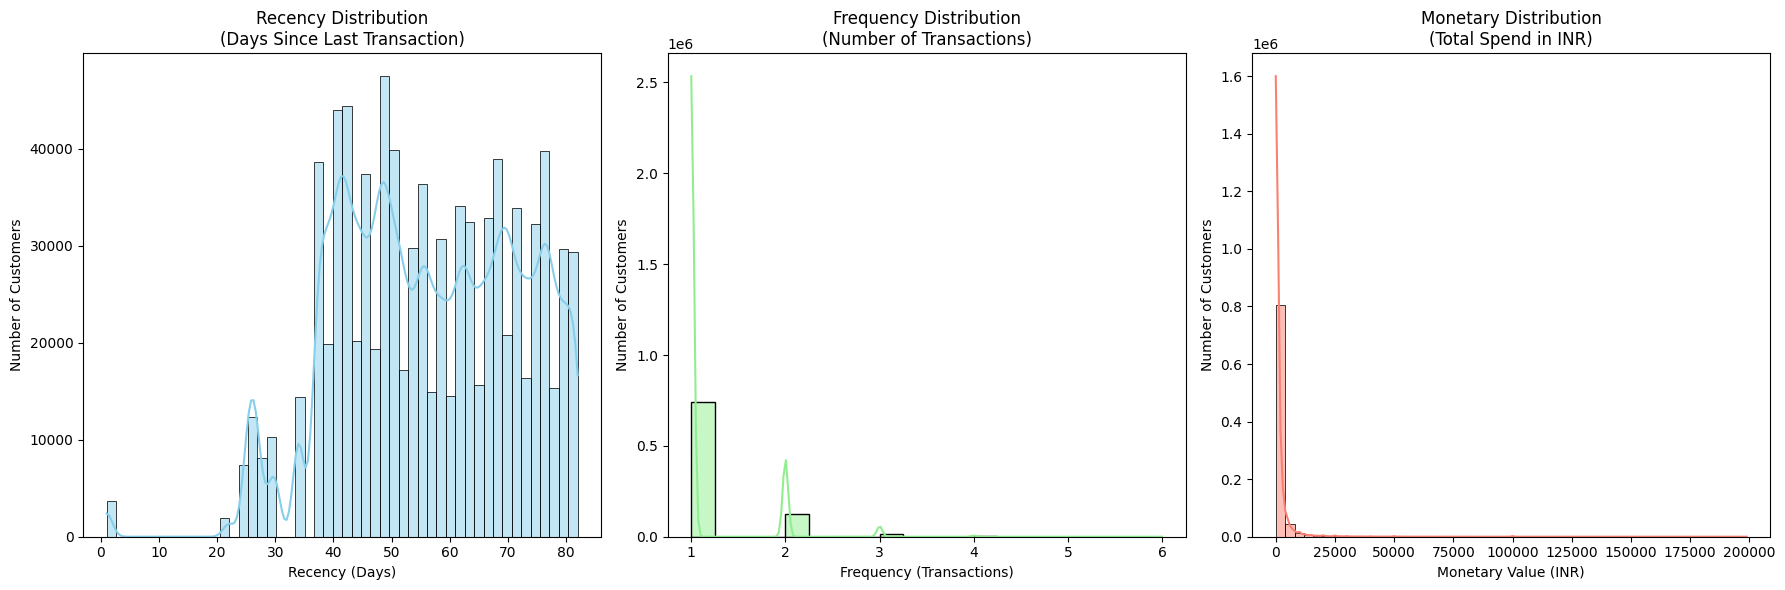

In [ ]:

snapshot_date = df["TransactionDate"].max() + pd.Timedelta(days=1)


rfm = df.groupby("CustomerID").agg({
    "TransactionDate": lambda x: (snapshot_date - x.max()).days,
    "TransactionID": "count",
    "TransactionAmount (INR)": "sum"
}).reset_index()
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

rfm_trimmed = rfm[(rfm["Frequency"] < 20) & (rfm["Monetary"] < 200000)]

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(rfm["Recency"], bins=50, kde=True, color='skyblue')
plt.title("Recency Distribution\n(Days Since Last Transaction)", fontsize=12)
plt.xlabel("Recency (Days)", fontsize=10)
plt.ylabel("Number of Customers")

# frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm_trimmed["Frequency"], bins=20, kde=True, color='lightgreen')
plt.title("Frequency Distribution\n(Number of Transactions)", fontsize=12)
plt.xlabel("Frequency (Transactions)", fontsize=10)
plt.ylabel("Number of Customers")

# monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm_trimmed["Monetary"], bins=50, kde=True, color='salmon')
plt.title("Monetary Distribution\n(Total Spend in INR)", fontsize=12)
plt.xlabel("Monetary Value (INR)", fontsize=10)
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

# Only use values > 0 for Box-Cox
rfm_filtered = rfm[(rfm["Recency"] > 0) & (rfm["Frequency"] > 0) & (rfm["Monetary"] > 0)]

rfm_transformed = pd.DataFrame()
rfm_transformed["Recency"] = stats.boxcox(rfm_filtered["Recency"])[0]
rfm_transformed["Frequency"] = stats.boxcox(rfm_filtered["Frequency"])[0]
rfm_transformed["Monetary"] = stats.boxcox(rfm_filtered["Monetary"])[0]
rfm_transformed.head()

,Recency,Frequency,Monetary
0,38.409021,0.123685,10.416967
1,122.902980,0.000000,8.663973
2,137.799905,0.123685,8.622557
3,58.604694,0.000000,3.676182
4,114.507756,0.000000,10.386139


# **PART B	Customer segmentation with k-means**

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler

rfm_filtered = rfm[(rfm["Recency"] > 0) & (rfm["Frequency"] > 0) & (rfm["Monetary"] > 0)]
rfm_transformed = pd.DataFrame()
rfm_transformed["Recency"] = stats.boxcox(rfm_filtered["Recency"])[0]
rfm_transformed["Frequency"] = stats.boxcox(rfm_filtered["Frequency"])[0]
rfm_transformed["Monetary"] = stats.boxcox(rfm_filtered["Monetary"])[0]

scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_transformed)

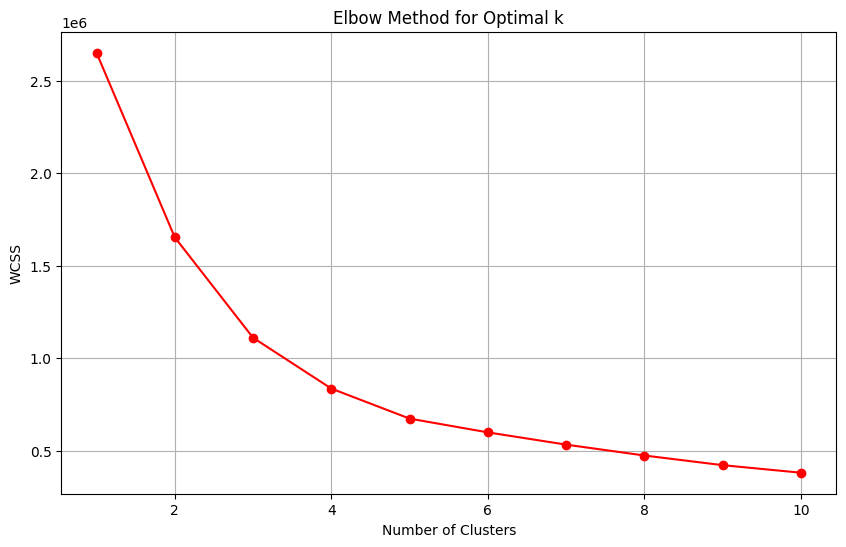

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(rfm_normalized)
    wcss.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_filtered['Cluster'] = kmeans.fit_predict(rfm_normalized)

<ipython-input-22-b8383a4f8097>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_filtered['Cluster'] = kmeans.fit_predict(rfm_normalized)


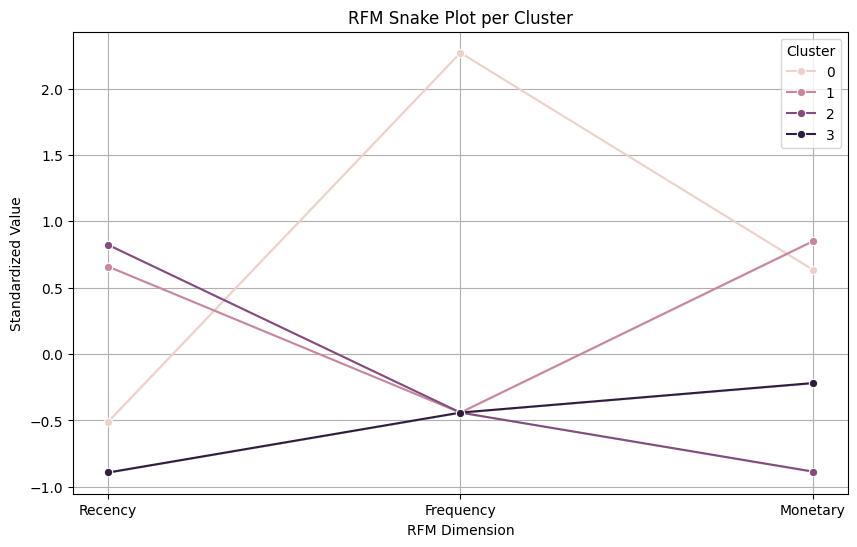

In [ ]:
import seaborn as sns
import pandas as pd

rfm_norm_df = pd.DataFrame(rfm_normalized, columns=["Recency", "Frequency", "Monetary"])
rfm_norm_df["Cluster"] = kmeans.labels_
df_melt = pd.melt(rfm_norm_df.reset_index(), id_vars=["Cluster"],
                  value_vars=["Recency", "Frequency", "Monetary"],
                  var_name="RFM Metric", value_name="Value")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melt, x="RFM Metric", y="Value", hue="Cluster", marker="o")
plt.title("RFM Snake Plot per Cluster")
plt.ylabel("Standardized Value")
plt.xlabel("RFM Dimension")
plt.grid(True)
plt.show()

In [ ]:
df_melt["Value"] = df_melt.apply(lambda row: -row["Value"] if row["RFM Metric"] == "Recency" else row["Value"], axis=1)

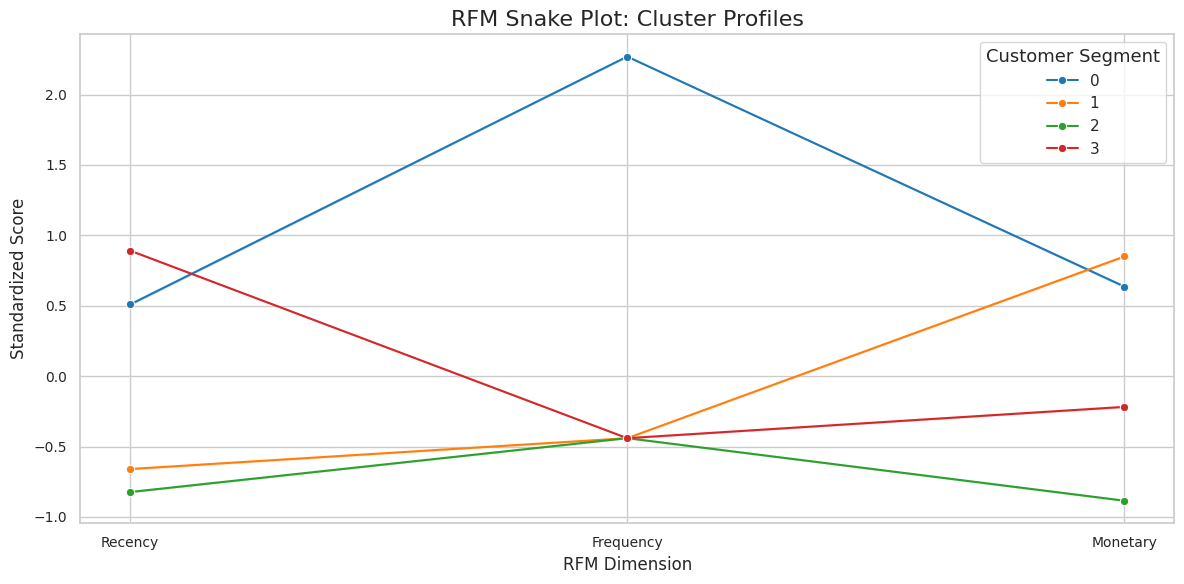

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.lineplot(data=df_melt, x="RFM Metric", y="Value", hue="Cluster", marker="o", palette="tab10")

plt.title("RFM Snake Plot: Cluster Profiles", fontsize=16)
plt.xlabel("RFM Dimension", fontsize=12)
plt.ylabel("Standardized Score", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Customer Segment', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

In [ ]:
rfm_filtered.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean().round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,48.60,2.14,3370.26
1,66.33,1.00,4194.48
2,68.75,1.00,196.62
3,42.79,1.00,785.76


# **Part C: Result Review**

In [ ]:
rfm_filtered.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean().round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,48.60,2.14,3370.26
1,66.33,1.00,4194.48
2,68.75,1.00,196.62
3,42.79,1.00,785.76


In [ ]:
# Find top 5 locations by transaction count
top5_locations = df['CustLocation'].value_counts().nlargest(5).index.tolist()
print("Top 5 Locations:", top5_locations)

Top 5 Locations: ['MUMBAI', 'NEW DELHI', 'BANGALORE', 'GURGAON', 'DELHI']


In [ ]:
# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True)

# Set snapshot date (last transaction date + 1)
snapshot_date = df['TransactionDate'].max() + pd.Timedelta(days=1)

# Filter for top 5 locations
df_top = df[df['CustLocation'].isin(top5_locations)]

# Calculate RFM for each customer in each location
rfm = df_top.groupby(['CustLocation', 'CustomerID']).agg({
    'TransactionDate': lambda x: (snapshot_date - x.max()).days,
    'TransactionID': 'count',
    'TransactionAmount (INR)': 'sum'
}).reset_index()

rfm.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

rfm['Cluster'] = -1  # Placeholder

for location in top5_locations:
    rfm_loc = rfm[rfm['CustLocation'] == location][['Recency', 'Frequency', 'Monetary']]
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm_loc)

    # Choose 3 or 4 clusters (you can adjust)
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(rfm_scaled)

    # Assign clusters back to main RFM DataFrame
    rfm.loc[rfm['CustLocation'] == location, 'Cluster'] = clusters

# Now, rfm has a 'Cluster' column for each customer in each location


In [ ]:
cluster_summary = rfm.groupby(['CustLocation', 'Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)
print(cluster_summary)


                     Recency Frequency    Monetary       
                        mean      mean        mean  count
CustLocation Cluster                                     
BANGALORE    0         70.56      1.00     1176.59  40939
             1         59.13      1.00    66797.69    338
             2         44.66      1.00     1179.86  37882
             3         50.45      2.02     2511.41   1188
DELHI        0         70.31      1.00     1250.79  35059
             1         44.38      1.00     1257.06  33790
             2         55.69      1.00    63331.46    275
             3         48.85      2.01     2630.96    943
GURGAON      0         70.40      1.00     1481.55  36854
             1         48.60      2.01     2900.15    956
             2         44.62      1.00     1516.94  35045
             3         65.00      1.00  1560034.99      1
MUMBAI       0         44.56      1.00     1564.20  48055
             1         70.31      1.00     1548.27  51671
             2